In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

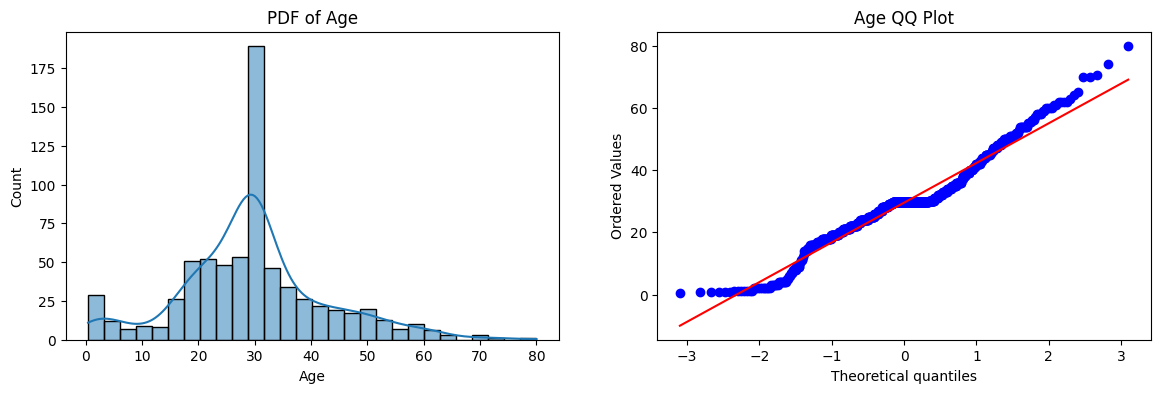

In [8]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(X_train['Age'], kde=True)
plt.title("PDF of Age")

plt.subplot(1, 2, 2)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age QQ Plot")
plt.show()

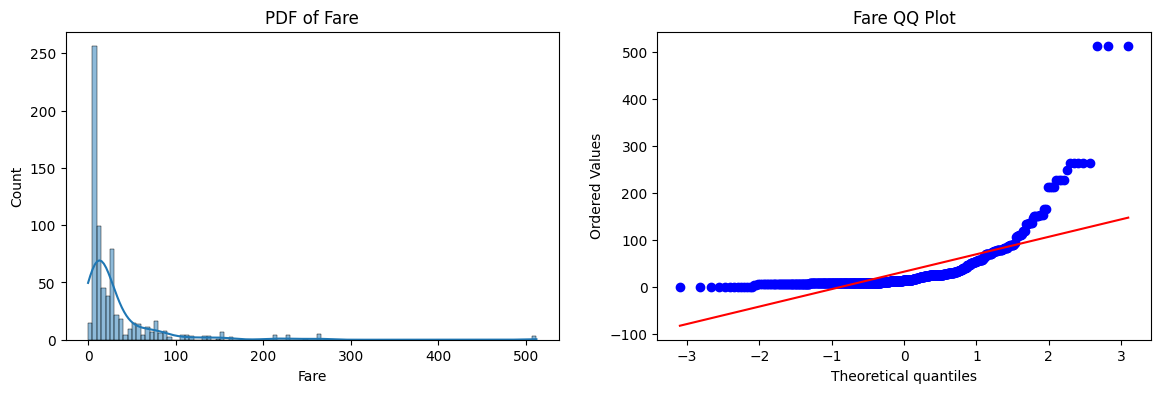

In [9]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(X_train['Fare'], kde=True)
plt.title("PDF of Fare")

plt.subplot(1, 2, 2) 
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ Plot")
plt.show()

In [10]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)

LogisticRegression()

In [12]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [15]:
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6536312849162011


In [17]:
trf = FunctionTransformer(func=np.log1p)   # use log function

In [18]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [32]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.7374301675977654
Accuracy DT 0.5865921787709497


##### check real it score good or not that's why we use cross_val_score

In [33]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6577028714107367


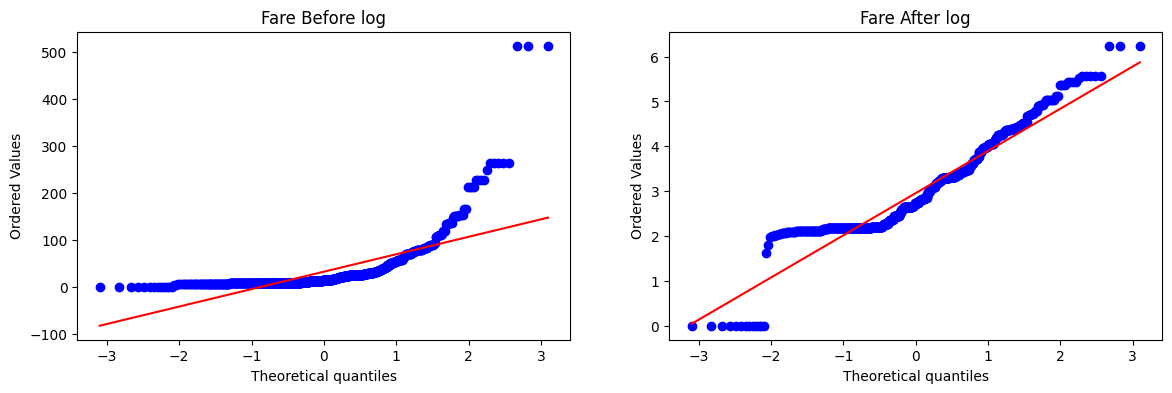

In [36]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title("Fare Before log")

plt.subplot(1, 2, 2)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title("Fare After log")
plt.show()

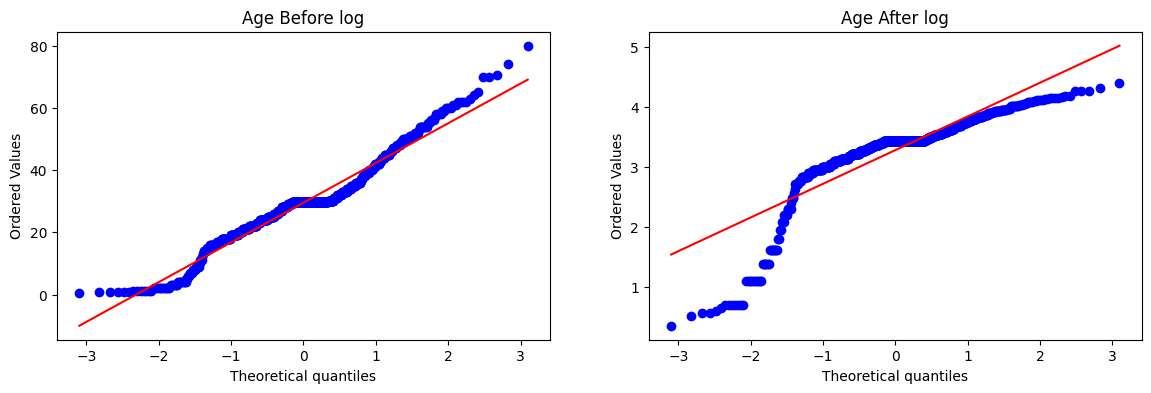

In [37]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title("Age Before log")

plt.subplot(1, 2, 2)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title("Age After log")
plt.show()

##### Age column did not stay not right skewde then graph is dispoint, that's why i use column transformer ,
##### when i do Fare column transformer and Age column not

In [42]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(func=np.log1p), ['Fare'])  # use tuple here
], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [44]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


##### check real it score good or not that's why we use cross_val_score

In [45]:
X_transformed2 = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6543570536828963
